**Get all options for a given technology**

- "all options" is an approximation, which sums up all the options for each technology across all analyzed projects

In [4]:
import pandas as pd
import glob

option_files = glob.glob("../data/extracted_config_data/*_options.csv")

results_dfs = []

for file_name in option_files:
    df = pd.read_csv(file_name)

    results_dfs.append(df)

df_all = pd.concat(results_dfs, ignore_index=True)

df_technologies = (
    df_all.groupby('Concept')
    .apply(lambda x: x[['Option']].drop_duplicates().reset_index(drop=True))
    .reset_index()
    .drop(columns=['level_1'])
)

technologies = df_technologies['Concept'].unique()

for technology in technologies:
    df_technology = df_technologies[df_technologies['Concept'] == technology]
    df_technology.to_csv(f"../data/technologies/{technology}_options.csv", index=False)

/tmp/ipykernel_325079/612862177.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[['Option']].drop_duplicates().reset_index(drop=True))


**Visualize the total number of options for each technology**

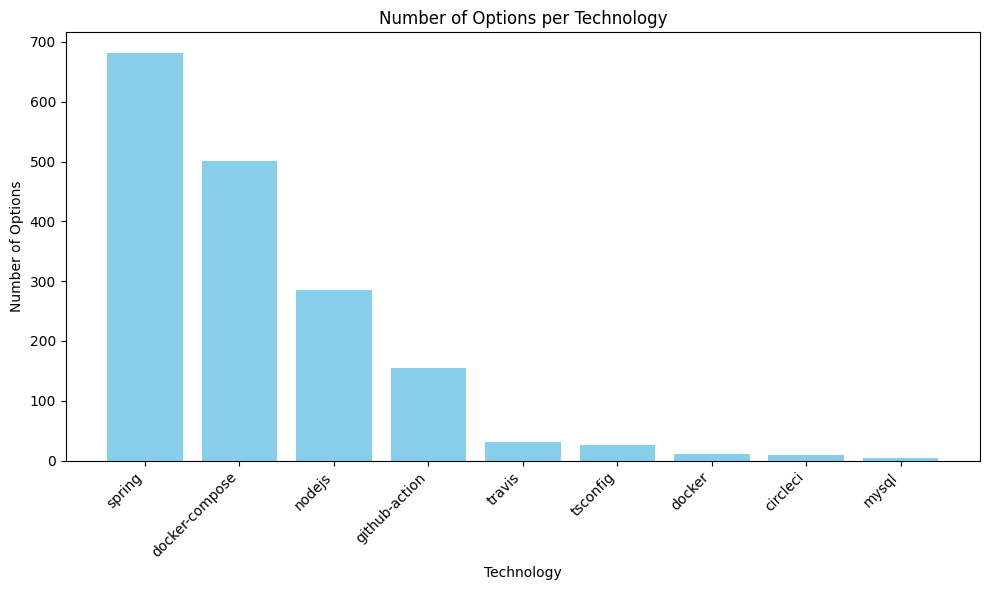

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

technology_files = glob.glob("../data/technologies/*_options.csv")

num_options = []

common_file_types = ["json", "yaml", "configparser"]


for file_name in technology_files:
    technology = file_name.split("/")[-1].split("_")[0]
    if technology in common_file_types:
        continue
    df = pd.read_csv(file_name)
    num_options.append((technology, len(df)))



# Create a bar chart
df_num_options = pd.DataFrame(num_options, columns=['Technology', 'Num_Options'])
df_num_options.sort_values(by='Num_Options', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.bar(df_num_options['Technology'], df_num_options['Num_Options'], color='skyblue')
plt.xlabel('Technology')
plt.ylabel('Number of Options')
plt.title('Number of Options per Technology')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Determine how many options are actually set in a given project**

In [ ]:
import pandas as pd
import glob

technologies = glob.glob("../data/technologies/*_options.csv")
results_dfs = []
common_file_types = ["json", "yaml", "configparser"]


# Read all the technology files and get their dataframes
for file_name in technologies:
    technology = file_name.split("/")[-1].split("_")[0]
    if technology in common_file_types:
        continue
    df = pd.read_csv(file_name)
    results_dfs.append(df)

df_all = pd.concat(results_dfs, ignore_index=True)

project_option_file = "../data/extracted_config_data/piggymetrics_options.csv"





,Concept,Option
0,travis,language
1,travis,node_js
2,travis,notifications.email
3,travis,script
4,travis,after_success
...,...,...
6975,github-action,jobs.publish.steps.with.server-password
6976,github-action,jobs.publish.steps.with.server-username
6977,github-action,on.workflow_dispatch.inputs.repository.default
6978,github-action,on.workflow_dispatch.inputs.repository.descrip...
